In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

##### 非线性回归案例

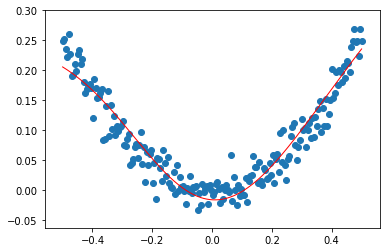

In [24]:
#生成[-0.5, 0.5]中200个随机点,均匀分布的点
#添加一列维度最后为200行1列
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

#定义占位符,其代表输入数据跟结果数据
x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32, [None,1])

#定义神经网络
#第一层包含10个神经元
Weight_L1 = tf.Variable(tf.random.normal([1,10]))
bias_L1 = tf.Variable(tf.zeros([1,10]))
L1_res =tf.matmul(x,Weight_L1) + bias_L1
L1 = tf.nn.tanh(L1_res)

#第二层
Weight_L2 = tf.Variable(tf.random.normal([10,1]))
bias_L2 = tf.Variable(tf.zeros([1,1]))
L2_res =tf.matmul(L1,Weight_L2) + bias_L2
L2 = tf.nn.tanh(L2_res)

#定义代价函数
loss = tf.reduce_mean(tf.square(y - L2))
#定义梯度下降
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(2000):
        sess.run(train_step, feed_dict={x:x_data, y:y_data})
    #获得预测值
    prediction_value = sess.run(L2, feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data, prediction_value, 'r-', lw = 1)
    plt.show()